In [15]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import ndimage
from astropy.io.fits import getdata

Populating the interactive namespace from numpy and matplotlib


In [2]:
sky = getdata('allsky_shankj3.fit')

In [3]:
blue = sky[(20.0 < sky['r']) & (sky['r'] <= 20.66)]
green = sky[(20.66 < sky['r']) & (sky['r'] <=21.33)]
red = sky[(21.33 < sky['r']) & (sky['r'] <= 22.0)]
print len(red)

1808427


In [8]:
xedges = 2*(sky['ra'].max() - sky['ra'].min())
yedges = 2*(sky['dec'].max() - sky['dec'].min())
B, xedges, yedges = np.histogram2d(blue['ra'], blue['dec'], bins = (xedges, yedges))
G, xedges, yedges = np.histogram2d(green['ra'], green['dec'], bins = (xedges, yedges))
R, xedges, yedges = np.histogram2d(red['ra'], red['dec'], bins = (xedges, yedges))


In [9]:
r = np.where( (R < 25.5) | (R > 82.5) )
g = np.where( ( G < 26.77) | (G > 76) ) 
b = np.where(( B < 24.5) | (B > 66.75))
B[b] = 0
G[g] = 0
R[r] = 0

In [13]:
All = np.dstack((R/R.max(),G/G.max(),B/B.max()))

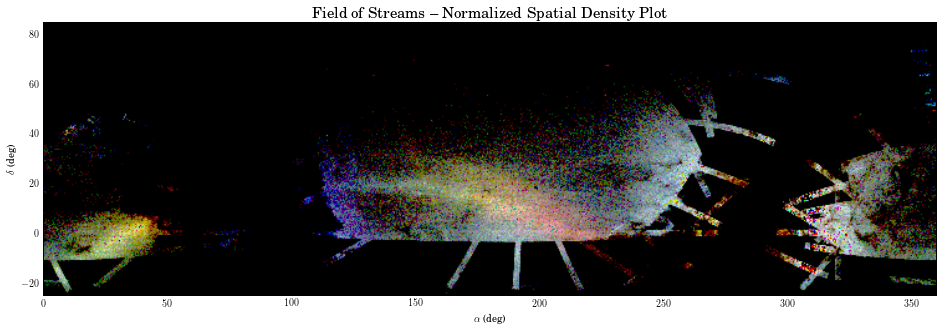

In [26]:
flip = ndimage.rotate(All,90)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(16,9))
plt.imshow(flip, extent = [sky['ra'].min(),sky['ra'].max(),sky['dec'].min(),sky['dec'].max()])
plt.ylabel(r'$\delta$ (deg)')
plt.xlabel(r'$\alpha$ (deg)')
plt.title('Field of Streams -- Normalized Spatial Density Plot', size=15)